<a href="https://colab.research.google.com/github/viannaandreBR/My-Data-Science-Journey/blob/main/Vis%C3%A3o_Computacional_original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visão computacional

## Detecção de faces

In [1]:
from numpy import *
import matplotlib.pyplot as plt
import cv2 # OpenCV

In [2]:
!pip3 install opencv-python #linux

In [3]:
cv2.__version__

'4.5.4-dev'

In [8]:
#imagem = cv2.imread('/content/workplace-1245776_1920.jpg', cv2.IMREAD_COLOR)
#img=cv2.imread('content/workplace-1245776_1920.jpg', cv2.IMREAD_COLOR)

#img=cv2.imread('content/workplace-1245776_1920.jpg')
img=plt.imread('content/workplace-1245776_1920.jpg')


In [ ]:
img

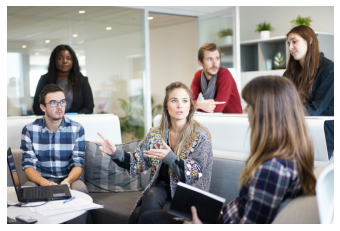

In [9]:
plt.imshow(img)
# limpar os eixos
plt.axis('off')

plt.show()

#cv2.imshow('texto',img)

#cv2.imshow('image',img)

#cv2.waitKey(0)
#cv2.destroyAllWindows()

#cv2.waitKey(10000)
#cv2.destroyAllWindows()

#cv2.waitKey(0); cv2.destroyAllWindows(); cv2.waitKey(1)

In [10]:
detector_face = cv2.CascadeClassifier('content/haarcascade_frontalface_default.xml')

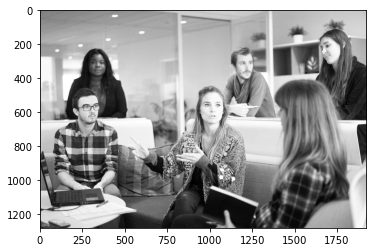

In [24]:
#imagem_cinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#imagem_cinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#cv2_imshow(imagem_cinza)
#plt.imshow(imagem_cinza)

imagem_cinza = plt.imshow(img[:,:,0],cmap=plt.cm.gray)
# limpar os eixos
#plt.axis('off')
#plt.show(imagem_cinza)
imagem_cinza
img_gray=pt
#plt.show(imagem_cinza)

In [25]:
#plt.show(imagem_cinza)
imagem_cinza

In [26]:
deteccoes = detector_face.detectMultiScale(imagem_cinza, scaleFactor=1.3, minSize=(30,30))

error: OpenCV(4.5.4-dev) :-1: error: (-5:Bad argument) in function 'detectMultiScale'
> Overload resolution failed:
>  - image is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'image'


In [27]:
deteccoes

NameError: name 'deteccoes' is not defined

In [ ]:
len(deteccoes)

In [ ]:
for (x, y, l, a) in deteccoes:
  #print(x, y, l, a)
  cv2.rectangle(img, (x, y), (x + l, y + a), (0,255,0), 2)
#cv2_imshow(imagem)
plt.imshow(img)

## Detecção do corpo

In [ ]:
image = cv2.imread('/content/pessoas.jpg')
cv2_imshow(image)

In [ ]:
detector_corpo = cv2.CascadeClassifier('/content/fullbody.xml')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = detector_corpo.detectMultiScale(image_gray, scaleFactor=1.1, minSize=(50,50))
print(len(detections))
print(detections)
for (x, y, l, a) in detections:
  cv2.rectangle(image, (x, y), (x + l, y + a), (0,255,0), 2)
cv2_imshow(image)

## Reconhecimento facial

### Treinamento

In [ ]:
from PIL import Image
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import zipfile
path = '/content/drive/My Drive/Cursos - recursos/yalefaces.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
import os
os.listdir('/content/yalefaces/treinamento')

In [ ]:
def dados_imagem():
  caminhos = [os.path.join('/content/yalefaces/treinamento', f) for f in os.listdir('/content/yalefaces/treinamento')]
  faces = []
  ids = []
  for caminho in caminhos:
    if caminho == '/content/yalefaces/treinamento/.ipynb_checkpoints':
      continue
    imagem = Image.open(caminho).convert('L')
    imagem_np = np.array(imagem, 'uint8')
    id = int(os.path.split(caminho)[1].split('.')[0].replace('subject', ''))
    ids.append(id)
    faces.append(imagem_np)
  return np.array(ids), faces

In [ ]:
ids, faces = dados_imagem()

In [ ]:
print(ids)

In [ ]:
print(faces[0])

In [ ]:
lbph = cv2.face.LBPHFaceRecognizer_create()
lbph.train(faces, ids)
lbph.write('classificadorLBPH.yml')

### Classificação

In [ ]:
reconhecedor = cv2.face.LBPHFaceRecognizer_create()
reconhecedor.read('/content/classificadorLBPH.yml')

In [ ]:
imagem_teste = '/content/yalefaces/teste/subject10.sad.gif'

In [ ]:
imagem = Image.open(imagem_teste).convert('L')
imagem_np = np.array(imagem, 'uint8')
print(imagem_np)

In [ ]:
idprevisto, _ = reconhecedor.predict(imagem_np)
idprevisto

In [ ]:
idcorreto = int(os.path.split(imagem_teste)[1].split('.')[0].replace('subject', ''))
idcorreto

In [ ]:
cv2.putText(imagem_np, 'P: ' + str(idprevisto), (x,y + 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2.putText(imagem_np, 'C: ' + str(idcorreto), (x,y + 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2_imshow(imagem_np)